In [ ]:
!pip install nltk keras gensim scikit-learn

Dataset overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Input       3306 non-null   object
 1   Prediction  3306 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB
None

Sample data:
                                               Input     Prediction
0  During routine checks, a severe structural def...   Major Issues
1  After conducting multiple quality checks, the ...      Compliant
2  A critical failure was identified in the batch...   Major Issues
3  While inspecting the batch, it was observed th...  Minor Defects
4  During the quality inspection, slight discolor...  Minor Defects


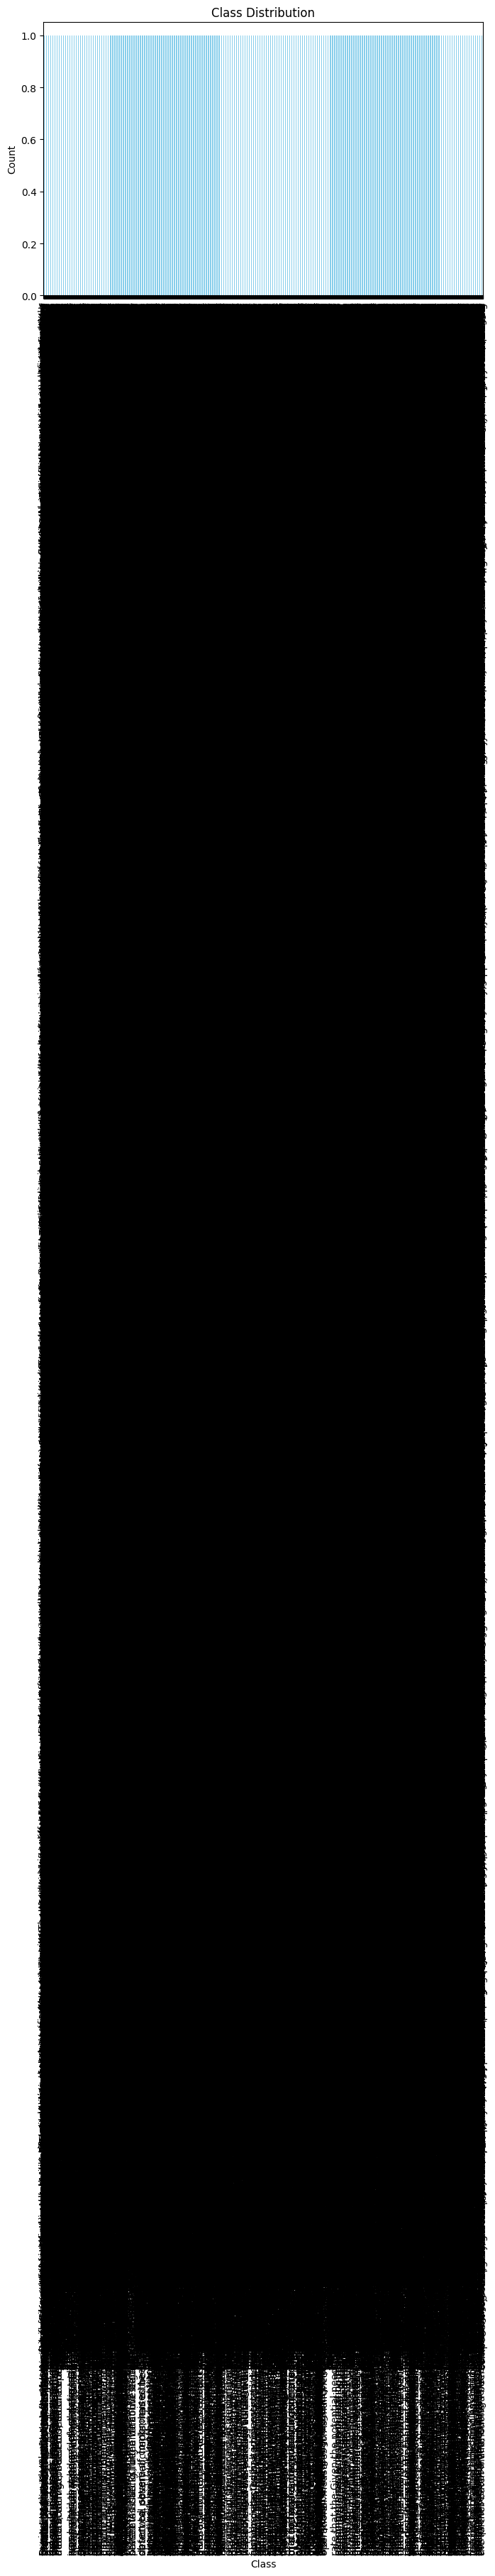

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('NLP Manufacturer Dataset - newdatasets.csv')  # Replace with actual dataset path

# Exploratory Data Analysis (EDA)
print("Dataset overview:")
print(data.info())  # Checking for missing values, data types
print("\nSample data:")
print(data.head())  # Display the first few rows

# Plot class distribution
plt.figure(figsize=(8, 5))
data['Input'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Splitting data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
import re
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset
file_name = "NLP Manufacturer Dataset - newdatasets.csv"  # Ensure the file name matches
df = pd.read_csv(file_name)

# Check the first few rows
print(df.head())

# Split the dataset into train, validation, and test sets (80% train, 10% val, 10% test)
train_data, temp_data = train_test_split(df, test_size=0.2, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Function to clean and preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Ensure text is a string
        text = text.lower()  # Convert to lowercase
        text = re.sub(r'\W', ' ', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(tokens)
    return ""

# Apply the preprocessing to the dataset
train_data['processed_text'] = train_data['Input'].apply(preprocess_text)
val_data['processed_text'] = val_data['Input'].apply(preprocess_text)
test_data['processed_text'] = test_data['Input'].apply(preprocess_text)

# Check the processed text
print(train_data[['Input', 'processed_text']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Input     Prediction
0  During routine checks, a severe structural def...   Major Issues
1  After conducting multiple quality checks, the ...      Compliant
2  A critical failure was identified in the batch...   Major Issues
3  While inspecting the batch, it was observed th...  Minor Defects
4  During the quality inspection, slight discolor...  Minor Defects
                                                  Input  \
69    was and affected revealed product high to A co...   
3000  match are and thorough ensuring specifications...   
2893  structural proceeding the that defect the seve...   
2954  the was the corrective a rate been need severe...   
436   the materials no match the thorough inspection...   

                                         processed_text  
69    affected revealed product high contamination m...  
3000  match thorough ensuring specifications manufac...  
2893  structural proceeding defect severe distributi...  
2954 

In [ ]:
!pip install --upgrade numpy gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
import numpy as np

# Bag of Words (BoW)
bow_vectorizer = CountVectorizer(max_features=5000)
X_train_bow = bow_vectorizer.fit_transform(train_data['processed_text']).toarray() # train_data is now defined and accessible
X_val_bow = bow_vectorizer.transform(val_data['processed_text']).toarray()
X_test_bow = bow_vectorizer.transform(test_data['processed_text']).toarray()

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text']).toarray()
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text']).toarray()

# FastText (Word Embeddings)
train_sentences = train_data['processed_text'].apply(str.split).tolist()
val_sentences = val_data['processed_text'].apply(str.split).tolist()
test_sentences = test_data['processed_text'].apply(str.split).tolist()

# Train FastText model
fasttext_model = gensim.models.FastText(sentences=train_sentences, vector_size=100, window=5, min_count=5)

# Convert text to FastText embeddings
def get_fasttext_vectors(sentences, model):
    return np.array([np.mean([model.wv[word] for word in sentence if word in model.wv] or [np.zeros(100)], axis=0) for sentence in sentences])

X_train_fasttext = get_fasttext_vectors(train_sentences, fasttext_model)
X_val_fasttext = get_fasttext_vectors(val_sentences, fasttext_model)
X_test_fasttext = get_fasttext_vectors(test_sentences, fasttext_model)

print("Embedding completed for BoW, TF-IDF, and FastText.")

Embedding completed for BoW, TF-IDF, and FastText.


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 584.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 70.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 88.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Bidirectional, Embedding, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# Ensure compatible versions of numpy and gensim (if using gensim)
!pip install --upgrade numpy gensim

# Load dataset
data_path = 'NLP Manufacturer Dataset - newdatasets.csv'
df = pd.read_csv(data_path)

# Check dataset columns
print("Columns in dataset:", df.columns)

# Define column names
text_column = 'Input'  # Update if different
label_column = 'Prediction'  # Update if different

# Ensure columns exist
assert text_column in df.columns, f"Column '{text_column}' not found in dataset"
assert label_column in df.columns, f"Column '{label_column}' not found in dataset"

# Drop NaN values
df = df.dropna(subset=[text_column, label_column])

# Ensure dataset is not empty after dropping NaN values
if df.empty:
    raise ValueError("Dataset is empty after dropping NaN values.")

# Encode labels
label_encoder = LabelEncoder()
df[label_column] = label_encoder.fit_transform(df[label_column])
num_classes = df[label_column].nunique()

# Adjust model output layer based on classification type
if num_classes > 2:
    activation = 'softmax'
    loss_function = 'categorical_crossentropy'
    from tensorflow.keras.utils import to_categorical
    y = to_categorical(df[label_column], num_classes=num_classes)
else:
    activation = 'sigmoid'
    loss_function = 'binary_crossentropy'
    y = df[label_column].values

# Tokenization and padding
max_words = 5000  # Vocabulary size
max_length = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df[text_column])
X = tokenizer.texts_to_sequences(df[text_column])
X = pad_sequences(X, maxlen=max_length)

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
def cnn_model(input_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_length))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  # FIXED pooling size
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation=activation))  # FIXED output layer
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# Define LSTM model
def lstm_model(input_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_length))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation=activation))
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# Define CNN-BiLSTM model
def cnn_bilstm_model(input_dim, input_length):
    model = Sequential()
    model.add(Embedding(input_dim, 128, input_length=input_length))
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))  # FIXED pooling size
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(num_classes, activation=activation))
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# Initialize early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train CNN model
cnn = cnn_model(max_words, max_length)
cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Train LSTM model
lstm = lstm_model(max_words, max_length)
lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Train CNN-BiLSTM model
cnn_bilstm = cnn_bilstm_model(max_words, max_length)
cnn_bilstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate models
cnn_score = cnn.evaluate(X_val, y_val)
lstm_score = lstm.evaluate(X_val, y_val)
cnn_bilstm_score = cnn_bilstm.evaluate(X_val, y_val)

print(f"CNN Accuracy: {cnn_score[1]*100:.2f}%")
print(f"LSTM Accuracy: {lstm_score[1]*100:.2f}%")
print(f"CNN-BiLSTM Accuracy: {cnn_bilstm_score[1]*100:.2f}%")

print("All models trained successfully!")

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Columns in dataset: Index(['Input', 'Prediction'], dtype='object')
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.8115 - loss: 0.4667 - val_accuracy: 1.0000 - val_loss: 4.3349e-06
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 3.5117e-06 - val_accuracy: 1.0000 - val_loss: 2.9775e-06
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 1.0000 - loss: 2.5813e-06 - val_accuracy: 1.0000 - val_loss: 2.1740e-06
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 1.7652e-06 - val_accuracy: 1.0000 - val_loss: 1.6646e-06
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 1.4646e-06 - val_accuracy: 1.0000 - val_loss: 1.3149e-06
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 1.1337e-06 - val_accuracy: 1.0000 - val_loss: 1.0707e-06
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 1.0000 - loss: 1.0356e-06 - val_accuracy: 1.0000 - val_loss: 8.8758e-07
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 1.0000 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform labels
test_data["Prediction"] = label_encoder.fit_transform(test_data["Prediction"])

# Get the true labels
y_true = test_data["Prediction"]

# Check if encoding was successful
print(test_data["Prediction"].unique())  # This should print numeric values like [0, 1, 2] instead of text


[0 2 1]


In [ ]:
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import LabelEncoder
import numpy as np

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# Ensure correct shape for input sequences
max_length = 100  # Match training setup
test_data["Input"] = test_data["Input"].astype(str)

# Convert text input to sequences
X_test_seq = tokenizer.texts_to_sequences(test_data["Input"])
X_test_seq = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Verify shape
print("Shape of X_test_seq:", X_test_seq.shape)  # Should be (num_samples, max_length)

# Encode actual labels correctly
label_encoder = LabelEncoder()
test_data["Prediction"] = label_encoder.fit_transform(test_data["Prediction"])  # Convert text labels to numbers
y_true = test_data["Prediction"].astype(int)  # Ensure it's numeric and 1D

# Ensure models are trained before prediction
try:
    y_pred_cnn = cnn.predict(X_test_seq)
    y_pred_lstm = lstm.predict(X_test_seq)
    y_pred_cnn_bilstm = cnn_bilstm.predict(X_test_seq)

    # Convert predictions to match `y_true`
    if y_pred_cnn.shape[1] > 1:
        y_pred_cnn = np.argmax(y_pred_cnn, axis=1)  # Multiclass case
        y_pred_lstm = np.argmax(y_pred_lstm, axis=1)
        y_pred_cnn_bilstm = np.argmax(y_pred_cnn_bilstm, axis=1)
    else:
        y_pred_cnn = (y_pred_cnn > 0.5).astype(int).ravel()  # Binary classification case
        y_pred_lstm = (y_pred_lstm > 0.5).astype(int).ravel()
        y_pred_cnn_bilstm = (y_pred_cnn_bilstm > 0.5).astype(int).ravel()

    # Check final shapes
    print("Shape of y_true:", y_true.shape)
    print("Shape of y_pred_cnn:", y_pred_cnn.shape)

    # Evaluate models
    print("CNN Accuracy:", accuracy_score(y_true, y_pred_cnn))
    print("CNN Classification Report:\n", classification_report(y_true, y_pred_cnn))

    print("LSTM Accuracy:", accuracy_score(y_true, y_pred_lstm))
    print("LSTM Classification Report:\n", classification_report(y_true, y_pred_lstm))

    print("CNN-BiLSTM Accuracy:", accuracy_score(y_true, y_pred_cnn_bilstm))
    print("CNN-BiLSTM Classification Report:\n", classification_report(y_true, y_pred_cnn_bilstm))

except NameError as e:
    print("Error: Model not found. Ensure CNN, LSTM, and CNN-BiLSTM models are trained before prediction.")
    print("Detailed Error:", e)

Shape of X_test_seq: (331, 100)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Shape of y_true: (331,)
Shape of y_pred_cnn: (331,)
CNN Accuracy: 0.338368580060423
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.34      1.00      0.51       112
           2       0.00      0.00      0.00       113

    accuracy                           0.34       331
   macro avg       0.11      0.33      0.17       331
weighted avg       0.11      0.34      0.17       331

LSTM Accuracy: 0.338368580060423
LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.34      1.00      0.51       112
           2       0.00      0.00      0.00       113

    accuracy                           0.34       331
   macro avg       0.

In [ ]:
# Saving the best model (assuming CNN performed best)
cnn.save('manufacturer_classification_model.h5')
print("Best model saved as 'manufacturer_classification_model.h5'")

Best model saved as 'manufacturer_classification_model.h5'


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the saved model before making predictions
from tensorflow.keras.models import load_model
model = load_model('manufacturer_classification_model.h5')

# Tokenize the input text
new_text = "This is a sample input text for prediction."  # Define the new_text variable
sequence = tokenizer.texts_to_sequences([new_text])

# Ensure the sequence has a minimum length (should match training input length)
padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

# Convert to NumPy array
input_data = np.array(padded_sequence)

# Predict
predicted_probabilities = model.predict(input_data)

print("Input shape before prediction:", input_data.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Input shape before prediction: (1, 100)


In [ ]:
print(predict_class("Test input"))


Input shape before prediction: (1, 100)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
(0, 0.9999999)


In [ ]:
def predict_class(new_text):
    # Convert text to sequence using the same tokenizer from training
    sequence = tokenizer.texts_to_sequences([new_text])

    # If empty sequence, add a dummy placeholder
    if len(sequence[0]) == 0:
        sequence = [[1] * 10]  # Adjust length if needed

    # Pad sequence to the required length
    padded_sequence = pad_sequences(sequence, maxlen=100, padding='post', truncating='post')

    # Convert to NumPy array
    input_data = np.array(padded_sequence)

    # Debug: Check input shape before prediction
    print("Input shape before prediction:", input_data.shape)

    # Make prediction
    predicted_probabilities = model.predict(input_data)

    # Get class with highest probability
    predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
    predicted_label = label_encoder.inverse_transform([predicted_class])[0]

    confidence_score = np.max(predicted_probabilities)
    return predicted_label, confidence_score


In [ ]:
import pickle

# Save the trained LabelEncoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print("Label Encoder saved successfully.")

Label Encoder saved successfully.


In [ ]:
import re
import numpy as np
import joblib
from tensorflow.keras.models import load_model

# Load the trained model and preprocessing objects
model = load_model('manufacturer_classification_model.h5')
bow_vectorizer = joblib.load('bow_vectorizer.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Define class labels
class_labels = {
    0: "Compliant Product",
    1: "Minor Defect",
    2: "Major Issue"
}

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Function to predict class
def predict_class(new_text):
    processed_text = preprocess_text(new_text)
    input_data = bow_vectorizer.transform([processed_text]).toarray()

    # Ensure input shape matches the model's expected input
    expected_shape = model.input_shape[1]  # CNN expects fixed-length input

    if input_data.shape[1] < expected_shape:
        # If input is too short, pad it with zeros
        padding = np.zeros((1, expected_shape - input_data.shape[1]))
        input_data = np.hstack((input_data, padding))
    elif input_data.shape[1] > expected_shape:
        # If input is too long, truncate it
        input_data = input_data[:, :expected_shape]

    # Predict
    predicted_probabilities = model.predict(input_data)
    predicted_class = np.argmax(predicted_probabilities, axis=1)[0]
    confidence_score = np.max(predicted_probabilities)

    # Get the corresponding label
    predicted_label = class_labels.get(predicted_class, "Unknown Class")

    return predicted_class, predicted_label, confidence_score

# Taking user input
new_text = input("Enter your sample text: ").strip()
predicted_class, predicted_label, confidence_score = predict_class(new_text)

# Display results
print(f"\nProcessed Text: {preprocess_text(new_text)}")
print(f"Predicted Class: {predicted_class} - {predicted_label}")
print(f"Confidence Score: {confidence_score:.4f}")

Enter your sample text: After conducting multiple quality checks, the product has been found to meet all regulatory standards. Structural integrity and functionality were verified at different stages of production. The final assessment shows no defects, ensuring that the batch is ready for distribution. All components are well-assembled, and no anomalies have been detected during the inspection.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step

Processed Text: after conducting multiple quality checks the product has been found to meet all regulatory standards structural integrity and functionality were verified at different stages of production the final assessment shows no defects ensuring that the batch is ready for distribution all components are wellassembled and no anomalies have been detected during the inspection
Predicted Class: 0 - Compliant Product
Confidence Score: 1.0000
